# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [94]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [95]:
url_img = 'PROF_img/ladybug.png'
arr = imread(url_img)

Muestra la imagen para ver que se ha cargado bien

In [96]:
print(type(arr))
print(arr.shape)

<class 'numpy.ndarray'>
(533, 800, 3)


In [97]:
zeros = np.zeros(shape=(10, 10, 3)) + 100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


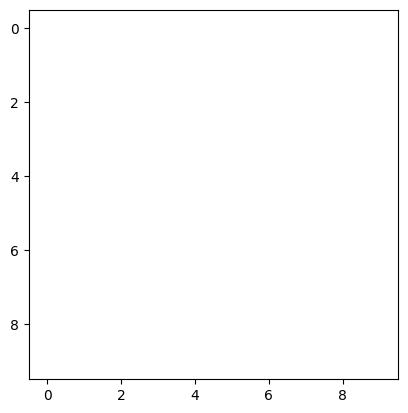

In [98]:
plt.imshow(zeros)

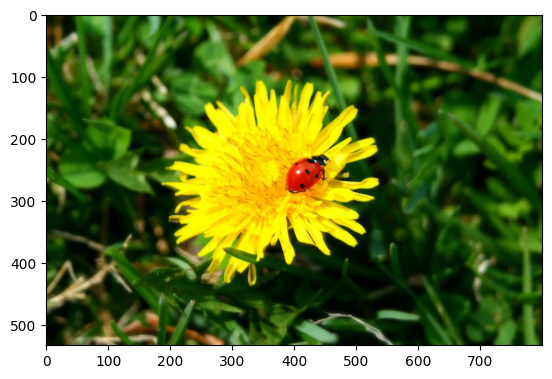

In [99]:
plt.imshow(arr)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [100]:
arr_res = arr.reshape(arr.shape[0] * arr.shape[1], -1)

In [101]:
arr_res.shape

(426400, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [85]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(arr_res)

KMeans(n_clusters=10, random_state=0)

In [86]:
arr_res

array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       ...,
       [0.03921569, 0.22745098, 0.        ],
       [0.01960784, 0.20392157, 0.        ],
       [0.00784314, 0.1882353 , 0.        ]], dtype=float32)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [87]:
kmeans.labels_.shape

(426400,)

In [88]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
kmeans.cluster_centers_

array([[0.06758873, 0.21044233, 0.01111533],
       [0.90743035, 0.74468195, 0.03023427],
       [0.35182965, 0.5596487 , 0.1788137 ],
       [0.26088253, 0.42385918, 0.07917118],
       [0.98438185, 0.9423863 , 0.02617038],
       [0.5415669 , 0.49459994, 0.16691741],
       [0.01679382, 0.09340903, 0.00513278],
       [0.80480707, 0.1612719 , 0.03961181],
       [0.6302556 , 0.6566272 , 0.4261963 ],
       [0.15574981, 0.32097834, 0.03075037]], dtype=float32)

In [90]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
labels_unique = np.unique(labels)

arr_out = np.zeros(shape=(arr.shape[0]*arr.shape[1], arr.shape[2]))

for clus in labels_unique:
    center_clus = centers[clus]
    idx_clus = np.where(labels == clus)[0]

    arr_out[idx_clus] = center_clus

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [91]:
img_out = arr_out.reshape(arr.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

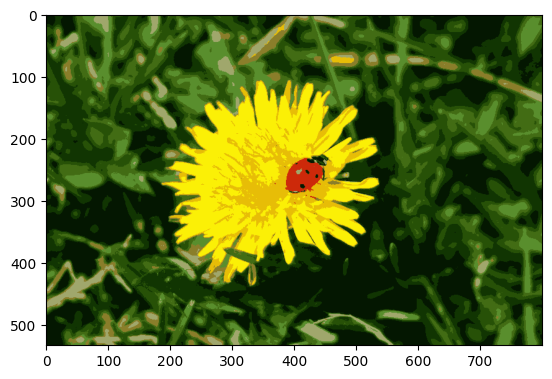

In [93]:
plt.imshow(img_out)
plt.savefig('lady_clust.png')

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [108]:
def agg_colors(img_path, n_colors, save_path=None):

    arr = imread(img_path)
    arr_res = arr.reshape(arr.shape[0] * arr.shape[1], -1)

    kmeans = KMeans(n_clusters=n_colors, random_state=0)
    kmeans.fit(arr_res)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    labels_unique = np.unique(labels)

    try:
        arr_out = np.zeros(shape=(arr.shape[0]*arr.shape[1], arr.shape[2]))
    except:
        arr_out = np.zeros(shape=(arr.shape[0]*arr.shape[1]))

    for clus in labels_unique:
        center_clus = centers[clus]
        idx_clus = np.where(labels == clus)[0]
        arr_out[idx_clus] = center_clus
    
    img_out = arr_out.reshape(arr.shape)

    plt.imshow(img_out)

    if save_path is not None:
        plt.savefig(save_path)

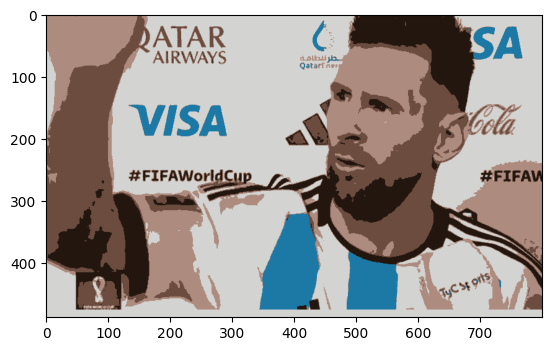

In [113]:
agg_colors('PROF_img/messi.png', 5, save_path='messi_quemiras.png')